<a href="https://colab.research.google.com/github/KrushnaChaure/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Krushna_Chaure_Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Netflix Movies and TV Shows Clustering**

**Project Type** - Unsupervised Machine Learning

**Contribution** - Individual 

# **Problem Statement**

Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

## **What is our Business Objective?**




*   Exploratory Data Analysis.

*   Understanding what type content is available in different countries.
*   Is Netflix has increasingly focusing on TV rather than movies in recent years.


*   Clustering similar content by matching text-based features.



# **Lets Begin & Kick start our journy**

## **1. Know Our Data**

### Import Libraries

In [16]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading


In [2]:
# Firstly we mount the drive over this colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
# Here we connecting & importing the dataset over this colab notebook
dataset= pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Attribute Information:

**1. show_id :** Unique ID for every Movie / Tv Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / Tv Show

**4. director :** Director of the Movie

**5. cast :** Actors involved in the movie / show

**6. country :** Country where the movie / show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual Releaseyear of the movie / show

**9. rating :** TV Rating of the movie / show

**10. duration :** Total Duration - in minutes or number of seasons

**11. listed_in :** Genere

**12. description:** The Summary description

### Dataset First View

In [33]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [34]:
# For finding how many rows & columns in our dataset
dataset.shape

(7787, 12)

### Dataset Information

In [35]:
# For finding information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Duplicate Values

In [36]:
# Here we checking duplicate values in our dataset
len(dataset[dataset.duplicated()])

0

### Missing Values/Null Values

In [37]:
# For checking NAN or Misssing/Null values in our dataset
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


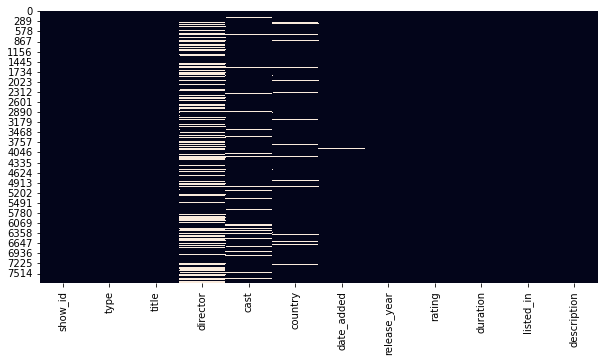

In [38]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(dataset.isnull(), cbar=False)

In [39]:
# Handling the missing values

# The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
dataset[['director','cast','country']] = dataset[['director','cast','country']].fillna('Unknown')

# The missing values in rating can be imputed with its mode, since this attribute is discrete.
dataset['rating'] = dataset['rating'].fillna(dataset['rating'].mode()[0])

# Drop missing value in date_added column.
dataset.dropna(axis=0, inplace = True)

### Understanding and Found some information about our dataset

*   This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.
*   The dataset contains 7787 records(Rows) and 12 attributes(Columns).
*   There are no duplicated records in the dataset.
*   There are many missing values in director, cast, country, date_added, and rating columns.

*   Hence The missing values in the director, cast, and country attributes can be replaced with 'Unknown' & The missing values in rating can be imputed with its mode, since this attribute is discrete & 10 records with missing values in the date_added column can be dropped.







In [40]:
# View new dataset
dataset.shape

(7777, 12)

## **2. Now understanding the variables available in dataset** 

In [41]:
# Dataset column name
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [42]:
# Dataset description
dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7777,7777,7777,7777,7777,7777,7777,7777.000000,7777,7777,7777,7777
unique,7777,2,7777,4050,6822,682,1565,NaN,14,216,491,7759
top,s1,Movie,3%,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2379,718,2549,118,NaN,2868,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Checking Unique Values for each variable in dataset

In [43]:
# For checking unique values in each column
for i in dataset.columns.tolist():
  print('No. of unique values in ',i,'is',dataset[i].nunique())

No. of unique values in  show_id is 7777
No. of unique values in  type is 2
No. of unique values in  title is 7777
No. of unique values in  director is 4050
No. of unique values in  cast is 6822
No. of unique values in  country is 682
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 491
No. of unique values in  description is 7759


## **3. Data Wrangling**

### Country & listed_in column

In [44]:
# Top countries
dataset.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [45]:
# Genre of shows
dataset.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

From above country and listed_in column:-

*   There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
*   To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed. Also, let's consider only the primary genre of the respective movie / TV show.



In [46]:
# Choosing the primary country and primary genre to simplify the analysis
dataset['country'] = dataset['country'].apply(lambda x: x.split(',')[0])
dataset['listed_in'] = dataset['listed_in'].apply(lambda x: x.split(',')[0])

In [47]:
# contry in which a movie was produced
dataset.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [48]:
# genre of shows
dataset.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

### Converting 'duration' column datatype from string to integer

In [49]:
# Splitting the duration column, and changing the datatype to integer
dataset['duration'] = dataset['duration'].apply(lambda x: int(x.split()[0]))

In [50]:
# Number of seasons for tv shows
dataset[dataset['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [51]:
# Movie length in minutes
dataset[dataset['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [52]:
# datatype of duration
dataset.duration.dtype

dtype('int64')

### Converting 'date_added' column from string to datetime format

In [53]:
# Converting 'date_added' from string to datetime
dataset["date_added"] = pd.to_datetime(dataset['date_added'])

In [54]:
# first and last date on which a show was added on Netflix
dataset.date_added.min(),dataset.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

From above

*   The shows were added on Netflix between 1st January 2008 and 16th January 2021.



In [55]:
# Adding new attributes month_added & year_added from date_added column
dataset['month_added'] = dataset['date_added'].dt.month
dataset['year_added'] = dataset['date_added'].dt.year

# Drop date_added column
dataset.drop('date_added', axis=1, inplace=True)

In [56]:
# New Dataset Rows & Columns 
dataset.shape

(7777, 13)

In [57]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   int64 
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  month_added   7777 non-null   int64 
 12  year_added    7777 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 850.6+ KB


Hurry, now our dataset is complately ready for EDA 

## **4. EDA, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **1. Univariate Analysis**

Univariate analysis explores each variable in a data set, separately. 

Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately. 

It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

Now Below is some variables which we doing analysis over them:- 

#### Chart-1

Here we use pie chart

A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable.

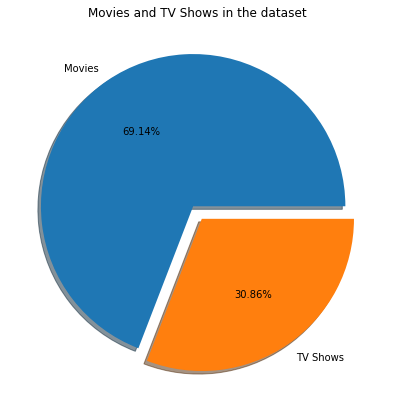

In [67]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(10,7))
y = dataset.type.value_counts()
mylabels = ['Movies', 'TV Shows']
myexplode = [0.05, 0.05]
plt.pie(y,labels = mylabels, explode = myexplode,autopct='%1.2f%%', shadow = True)
plt.title('Movies and TV Shows in the dataset')
plt.show() 

From above pie chart:-

*   There are higher movies 69.14% in datset as compare to TV shows 30.86% in the dataset.



#### Chart-2

Here we use bar plot

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

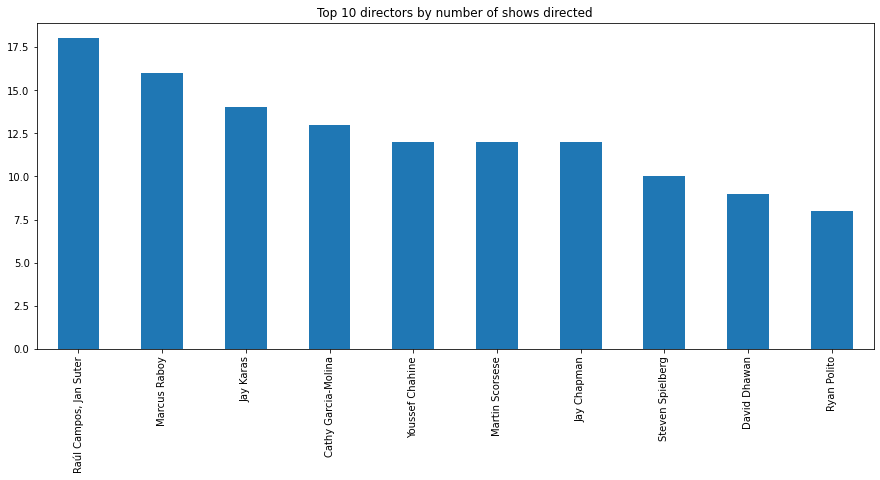

In [70]:
# Top 10 directors in the dataset
plt.figure(figsize=(15,6))
dataset[~(dataset['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of shows directed')

From above bar plot there are showing Top 10 directors by number of shows directed.

*   Raul Campos and Jan Suter together have directed 18 movies / TV shows, which is higher than anyone in the top 10 director in dataset.
*   Ryan polito & david dhawan have lowest no of directed movies / TV shows which is 8 & 9 respectively in top 10 director dataset.



#### Chart-3

#### Chart-3

#### Chart-4

#### Chart-5

#### Chart-6

#### Chart-7

#### Chart-8

#### Chart-9

#### Chart-10

#### Chart-11

#### Chart-12

### **2. Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. 

One variable here is dependent while the other is independent.

here we analyse the changes occured between the two variables and to what extent.

Now Below is some variables which we doing analysis over them:-

#### 1. Balance Limt VS Defaulter 

### **3. Multivariate Analysis**

Multivariate analysis (MVA) involves evaluating multiple variables (more than two) to identify any possible association among them. 



#### 1. Heatmap



What is Heatmap

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.

From above Heatmap we can see that:-



## **5. Feature Engineering & Data Pre-processing**

Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling. Feature engineering in machine learning aims to improve the performance of models.

Since our dataset do not contain very large number of dimensions. We will first try to use feature selection instead of the feature extraction technique.

### 1. Difference between Feature selection and Feature extraction

**Feature selection:-**

Feature Selection on the other hand is a machine learning technique applied on these (numerical) features.

we select a subset of the original feature set based on the statistical significance of different parameters.

Example: Backward elimination, Forward selection, Recursive feature elimination

**Feature extraction:-**

Feature Extraction transforms an arbitrary data, such as text or images, into numerical features that is understood by machine learning algorithms.

we build a new set of features from the original feature set.

Example: PCA, LDA, Kernel PCA

### 2. Feature selection

#### 3. Split Data

So here we divide our data in two divison:-

1. train split
2. test split

The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.

Before training our model on the dataset, we need to split the dataset into training and testing datasets. This is required to train our model on the major part of our dataset and test the accuracy of the model on the minor part. Let's split it.

### 3. Feature Extraction

We will use PCA for feature extraction i.e. Principal Component Analysis. It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

#### 1. Split Data

In [ ]:
# Lets split our data first before scaling the features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,Y,test_size=0.2, random_state=4)

#### 2. Scale Data

So here we scale the input varibles first before applying PCA to standardise the variance and avoid the bias. Lets Scale the data using StandardScaler.

Why we use scaler:-

So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

In [ ]:
# Applying Standard scaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

#### 3. PCA Application

Let's apply PCA technique on the training features to understand how many principal components should we select for our model to capture atleast 90% variance. For that we will take help of plot and cumsum function of numpy package.

From above we can see that almost 40 variables are needed for capturing atleast 99% of the variance in the training dataset. Hence we will use the same set of variables.

## **6. ML Model Implementation**

What is model in machine learning:-

*   A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

*   We need a model to train on our dataset to serve our purpose of prediciting the NYC taxi trip duration given the other features as training and test set. Since our dependent variable contains continous values so we will use regression technique to predict our output.

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets.





## **Conclusion**